**Case Study: Fast Food**

Importing libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns 

Loading the dataset csv file

In [2]:
df = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.shape

(1453, 15)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [39]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [5]:
df_1 = df.replace({"Yes":1,"No":0})
df_1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [6]:
df_1['VisitFrequency'] = df_1['VisitFrequency'].astype('category')
df_1['VisitFrequency'] = df_1['VisitFrequency'].cat.codes

In [7]:
df_1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,Male


In [8]:
df_1['VisitFrequency'].value_counts()

3    439
0    342
5    252
4    235
2    131
1     54
Name: VisitFrequency, dtype: int64

In [9]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [10]:
df_1['Like'] = df_1['Like'].astype('category')
df_1['Like'] = df_1['Like'].cat.codes

In [11]:
df_1['Like'].value_counts()

2     229
1     187
8     169
3     160
0     152
9     152
10    143
6      73
7      71
5      59
4      58
Name: Like, dtype: int64

In [12]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [13]:
df_1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,Female
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,Female
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,Female
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,Female
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,Male


In [14]:
df_1['Gender'] = df_1['Gender'].astype('category')
df_1['Gender'] = df_1['Gender'].cat.codes

In [15]:
df_1['Gender'].value_counts()

0    788
1    665
Name: Gender, dtype: int64

In [16]:
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [17]:
df_1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1


In [19]:
df_1.to_csv('df_1.csv')

In [31]:
df_1.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,-0.251600,-0.281653,-0.023896,-0.062545
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,-0.247663,-0.070597,-0.035920,-0.041402
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,0.022923,0.146217,-0.017184,0.051015
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.015972,-0.139254,0.005929,-0.059707
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,0.098425,-0.233554,0.007803,0.021801
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,-0.067114,-0.020558,0.011130,-0.049027
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,-0.057818,0.016958,0.032753,-0.116050
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,-0.287870,-0.194576,-0.023878,-0.044385
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,0.084583,-0.070851,-0.009614,0.144113
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,-0.024514,0.021366,-0.008230,-0.042455


**Pie Chart**

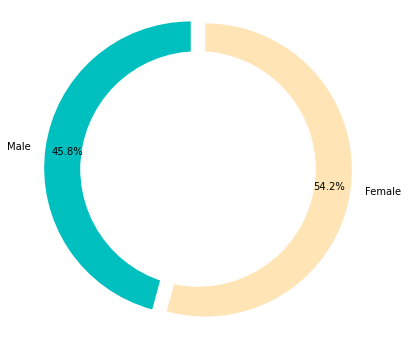

In [57]:
labels = ['Male','Female']
sizes = [df.query('Gender == "Male"').Gender.count(),df.query('Gender == "Female"').Gender.count()]

#colors
colors = ['c','moccasin']

#explsion
explode = (0.05,0.05)
plt.figure(figsize=(6,6)) 
my_circle = plt.Circle( (0,0), 0.8, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

**Heatmap**

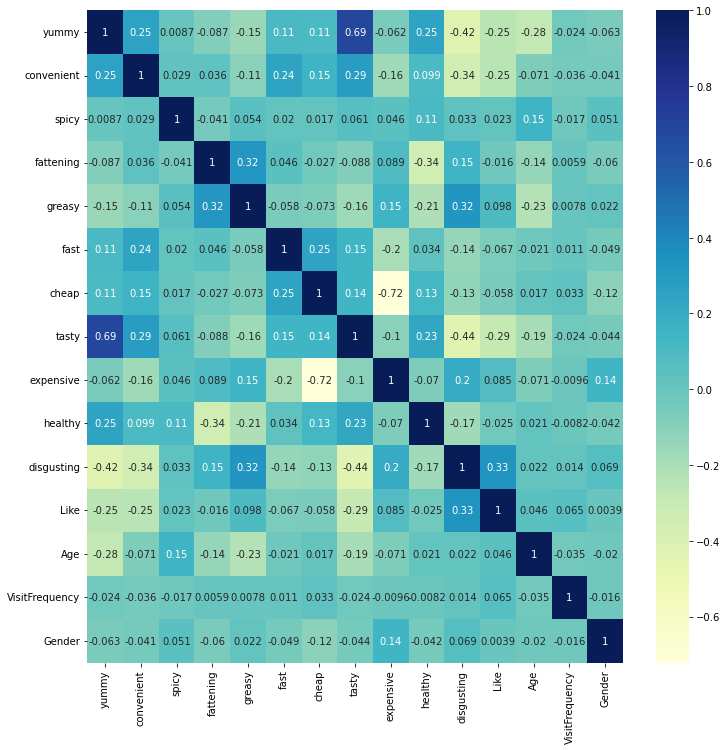

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(df_1.corr(), annot=True, cmap="YlGnBu")
plt.show()

**Count Plot**

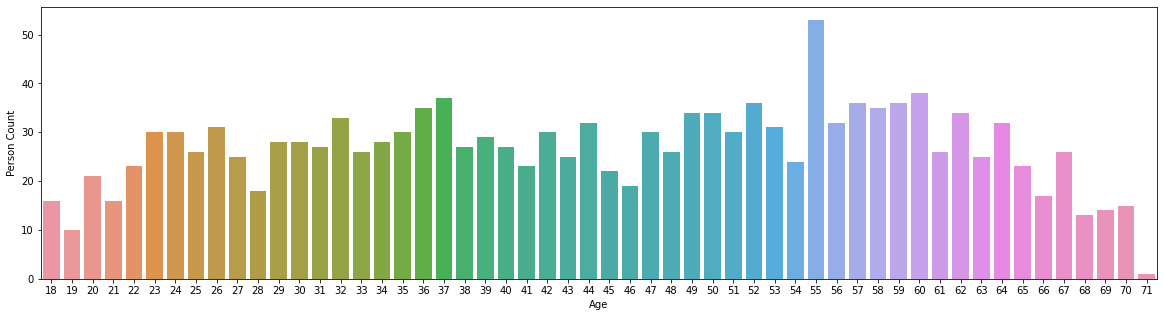

In [66]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['Age'])
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

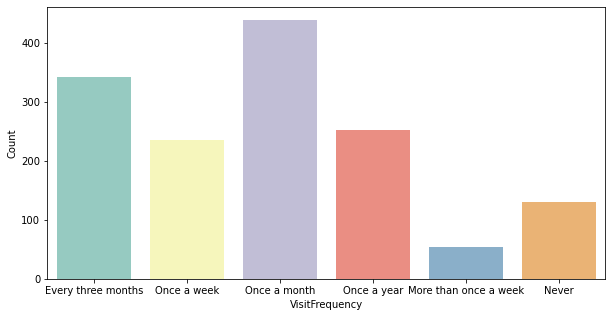

In [80]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['VisitFrequency'],palette="Set3")
plt.xlabel("VisitFrequency")
plt.ylabel("Count")
plt.show()

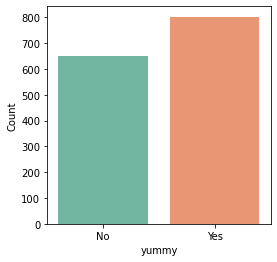

In [92]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['yummy'],palette="Set2")
plt.xlabel("yummy")
plt.ylabel("Count")
plt.show()

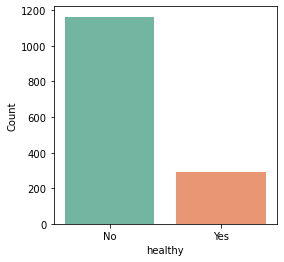

In [88]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['healthy'],palette="Set2")
plt.xlabel("healthy")
plt.ylabel("Count")
plt.show()

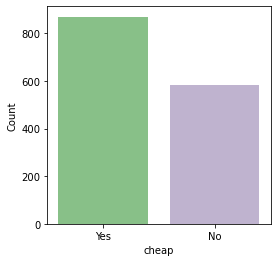

In [90]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['cheap'],palette="Accent")
plt.xlabel("cheap")
plt.ylabel("Count")
plt.show()

**Scatter Plots**

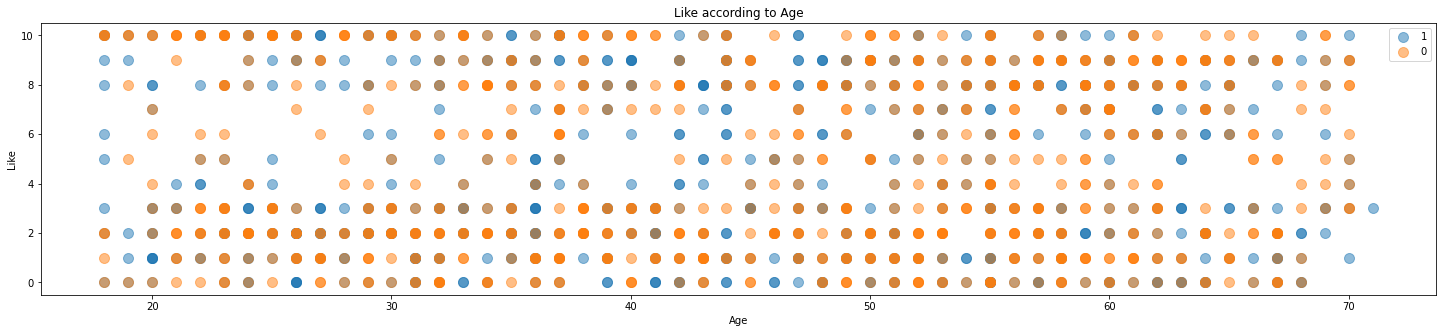

In [77]:
plt.figure(figsize=(25,5))
#1 is male, 0 is female

gender = [1,0]
for i in gender:
    plt.scatter(x='Age',y='Like', data=df_1[df_1['Gender']==i],s = 100 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Like")
plt.title("Like according to Age")
plt.show()

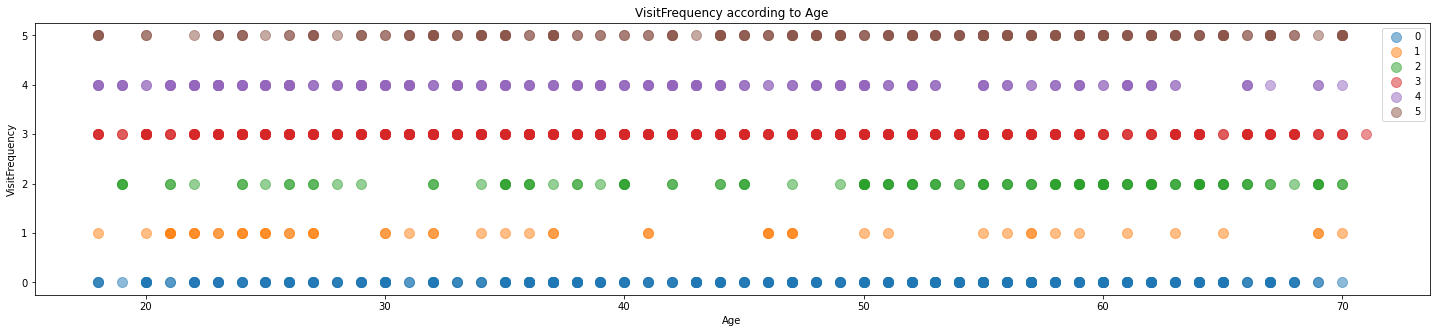

In [76]:
plt.figure(figsize=(25,5))

f = [0,1,2,3,4,5]
for i in f:
    plt.scatter(x='Age',y='VisitFrequency', data=df_1[df_1['VisitFrequency']==i],s = 100 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Age")
plt.ylabel("VisitFrequency")
plt.title("VisitFrequency according to Age")
plt.show()